# 子集

**题目来源：力扣（LeetCode）**

**链接：https://leetcode-cn.com/problems/subsets/**

## 一、题目

给定一组不含重复元素的整数数组 nums，返回该数组所有可能的子集（幂集）。

说明：解集不能包含重复的子集。

## 二、示例

输入: nums = [1,2,3]

输出:
[
  [3],
  [1],
  [2],
  [1,2,3],
  [1,3],
  [2,3],
  [1,2],
  []
]

## 三、解题思路

在所有子集中，生成各个子集，[[], [1], [2], [3], [1,2], [1,3], [2,3], [1,2,3]]，即是否选[1]，是否选[2]，是否选[3]的问题。

如果只使用循环，困难的地方在哪里？

使用循环难以直接模拟是否选某一元素的过程。

### 一、递归求解

In [1]:
def subsets(nums):
    res = []
    def helper(sub):
        if sub in res:
            return
        res.append(sub)
        for i in range(len(sub)):
            helper(sub[: i] + sub[i + 1:])
    helper(nums)
    return res

In [2]:
subsets([1, 2, 3])

[[1, 2, 3], [2, 3], [3], [], [2], [1, 3], [1], [1, 2]]

### 二、迭代

In [3]:
def subsets(nums):
    res = [[]]
    for i in nums:
        res = res + [[i] + num for num in res]
    return res

In [4]:
subsets([1, 2, 3])

[[], [1], [2], [2, 1], [3], [3, 1], [3, 2], [3, 2, 1]]

### 三、回溯法

利用回溯法生成子集，即对每个元素，都有试探放入或不放入集合中的两个选择：

选择放入该元素，递归的进行后续元素的选择，完成放入该元素后续所有元素的试探；之后将其拿出。即再进行一次不放入该元素，递归的进行后续所有元素的选择，完成不放入该元素后续所有元素的试探。

本来选择放入，再选择一次不放入的这个过程，称为回溯试探法。

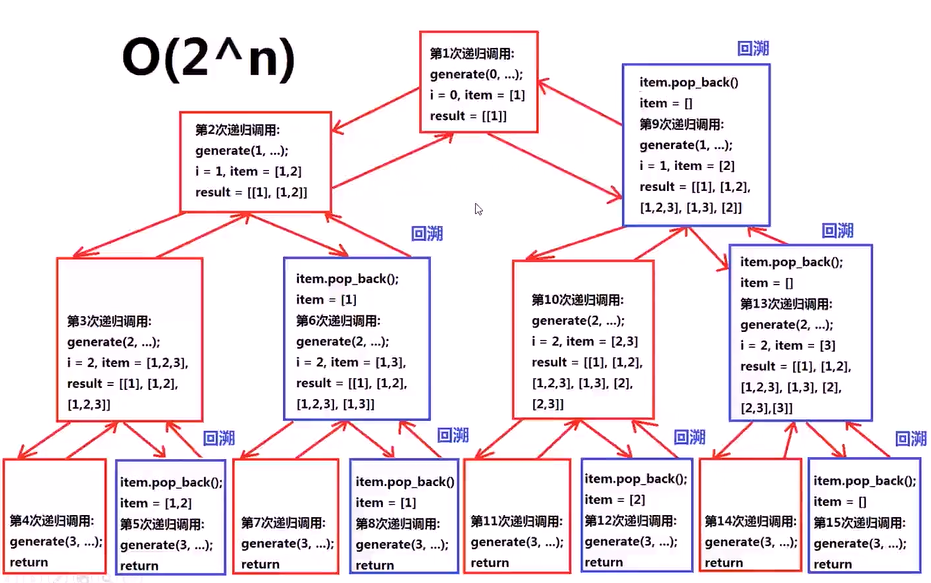

In [5]:
def subsets(nums):
    def generate(i, nums, item, result):
        if i >= len(nums):
            return
        item.append(nums[i])
        # 放入item的copy
        result.append(item[:])
        # 第一次递归
        generate(i + 1, nums, item, result)
        # 回溯
        item.pop()
        # 第二次递归
        generate(i + 1, nums, item, result)
    result = []
    item = []
    # 放入item的copy
    result.append(item[:])
    generate(0, nums, item, result)
    return result

In [6]:
subsets([1, 2, 3])

[[], [1], [1, 2], [1, 2, 3], [1, 3], [2], [2, 3], [3]]

### 四、位运算的思想

若集合有三个元素A、B、C，则三个元素有8种组成集合的方式，用0-7表示这些集合

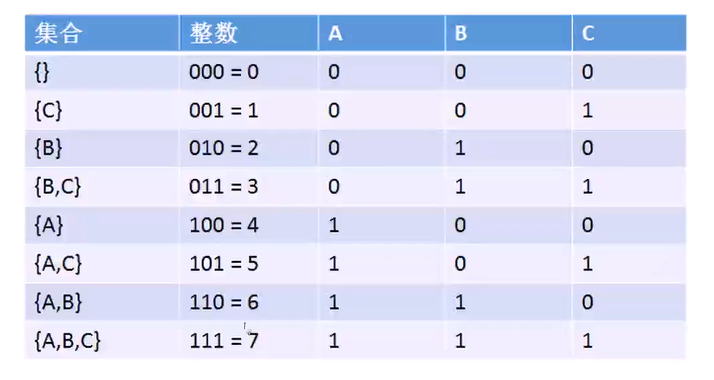

A元素为100 = 4

B元素为010 = 2

C元素为001 = 1

如构造某一集合，即使用A、B、C对应的三个整数与该集合对应的整数做&运算，当为真时，将改元素push进集合

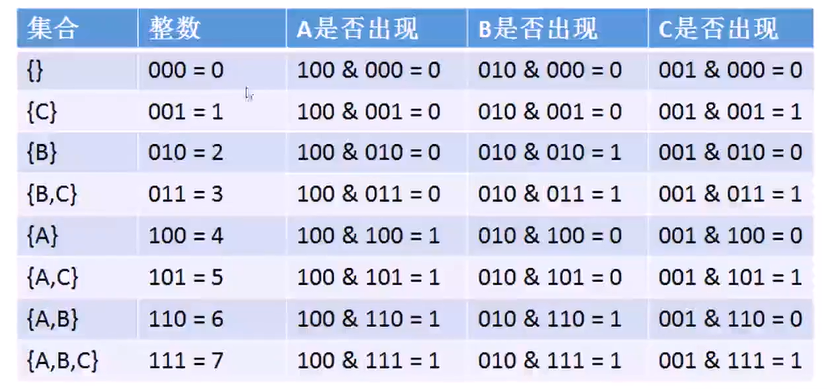

In [7]:
def subsets(nums):
    result = []
    # 1 << len(nums) = 2 ** len(nums)
    all_set = 1 << len(nums)
    for i in range(all_set):
        item = []
        for j in range(len(nums)):
            # j = 0 : 001, j = 1 : 010
            if i & (1 << j):
                item.append(nums[j])
        result.append(item)
    return result

In [8]:
subsets([1, 2, 3])

[[], [1], [2], [1, 2], [3], [1, 3], [2, 3], [1, 2, 3]]